In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [49]:
def is_message(line):
    return re.match(r'\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}', line) #padrao americano de data 

In [100]:
with open('teste.txt', 'r', encoding='utf-8') as file: # modificar o nome do arquivo
    lines = file.readlines()

dates = []
hours = []
senders = []
messages = []


In [101]:
for line in lines:
    line = line.strip()

    if is_message(line):
        # Extrair a data, o remetente e o conteúdo da primeira linha da mensagem
        date_match = re.match(r'(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2}) - (.*?): (.*)', line)  #padrao americano de data 
        if date_match:
            dates.append(date_match.group(1))    # Data
            hours.append(date_match.group(2))    # Hora
            senders.append(date_match.group(3))  # Remetente
            messages.append(date_match.group(4)) # Primeira linha do conteúdo
            
df = pd.DataFrame({'Data': dates, 'Hora': hours, 'Remetente': senders, 'Conteúdo': messages})


In [102]:
print(df) # Teste

          Data   Hora         Remetente  \
0      3/23/23  19:37  +55 41 9948-2644   
1      3/23/23  21:58  +55 41 9231-9009   
2      3/23/23  21:58  +55 41 9231-9009   
3      3/23/23  22:21  +55 41 9275-2325   
4      3/23/23  22:22  +55 41 9601-0756   
...        ...    ...               ...   
3528  10/23/24  14:30  +55 41 9133-4530   
3529  10/23/24  14:30    Guilherme Held   
3530  10/23/24  19:57  +55 41 9700-8641   
3531  10/23/24  19:57  +55 41 9700-8641   
3532  10/24/24  09:03  +55 41 9179-4299   

                                             Conteúdo  
0                 Marcelo Monitor.vcf (file attached)  
1                                     <Media omitted>  
2                                           É de alg?  
3                                é minha e do germano  
4                                                 vdd  
...                                               ...  
3528                                   muito obrigada  
3529  Vo perguntar pra ele se tem a

Resumo das conversas: apresenta uma lista de remetentes e o total de conversas para cada um, ordenando pelo remetente com maior quantidade para o menor.

In [103]:
resumo_conversas = df['Remetente'].value_counts().reset_index()
resumo_conversas.columns = ['Remetente', 'Total de Mensagens']
resumo_conversas = resumo_conversas.sort_values(by='Total de Mensagens', ascending=False).reset_index(drop=True)

print(resumo_conversas)

           Remetente  Total de Mensagens
0     Guilherme Held                 333
1   +55 41 9700-8641                 224
2   +55 41 8788-6113                 177
3   +55 41 9133-4530                 158
4              paulo                 146
..               ...                 ...
60  +55 41 8782-1639                   2
61  +55 41 9823-5166                   2
62  +55 41 9738-6167                   1
63             Juan.                   1
64  +55 41 8460-4237                   1

[65 rows x 2 columns]


Histórico do remetente: permite filtrar por remetente as suas mensagens, com data e hora.

In [104]:
remetente = input()

mensagens_remetente = df[df['Remetente'] == remetente]
print(mensagens_remetente[['Data', 'Hora','Conteúdo']])

          Data   Hora                                           Conteúdo
59      4/4/23  08:33                                    Churras da sala
62      4/4/23  08:34                                   é em condominio?
72      4/5/23  17:40                                                  s
120    4/10/23  13:41                                    Churras da sala
155    4/12/23  22:10            nada contra mas po n da pra entender nd
...        ...    ...                                                ...
3172   9/25/24  13:48                                                tem
3176   9/25/24  13:49                                    <Media omitted>
3262   10/7/24  15:41                               provavelmente github
3355   10/8/24  12:05                                              nmrl?
3449  10/10/24  16:22  acho q quando é só pra fzr trabalho ele faz a ...

[146 rows x 3 columns]


Gráfico do histórico do remetente: exibir um histograma da quantidade de conversas por dia para cada remetente.

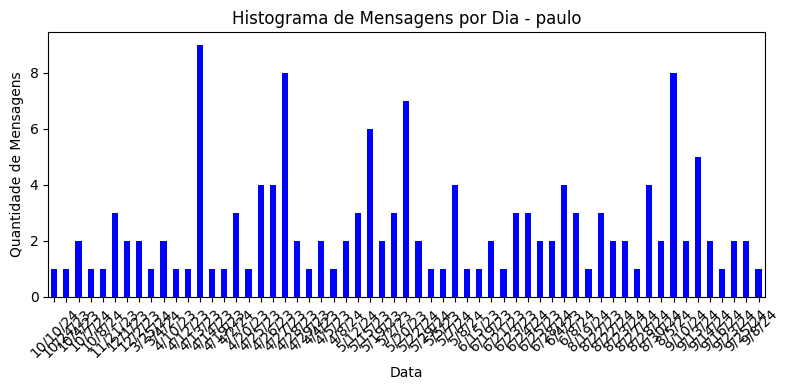

In [105]:
remetente = input()

mensagens_remetente = df[df['Remetente'] == remetente]
mensagens_por_dia = mensagens_remetente['Data'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
mensagens_por_dia.plot(kind='bar', color='blue')
plt.xlabel('Data')
plt.ylabel('Quantidade de Mensagens')
plt.title(f'Histograma de Mensagens por Dia - {remetente}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gráfico de pizza: exibir um gráfico considerando o percentual de mensagens de cada remetente.

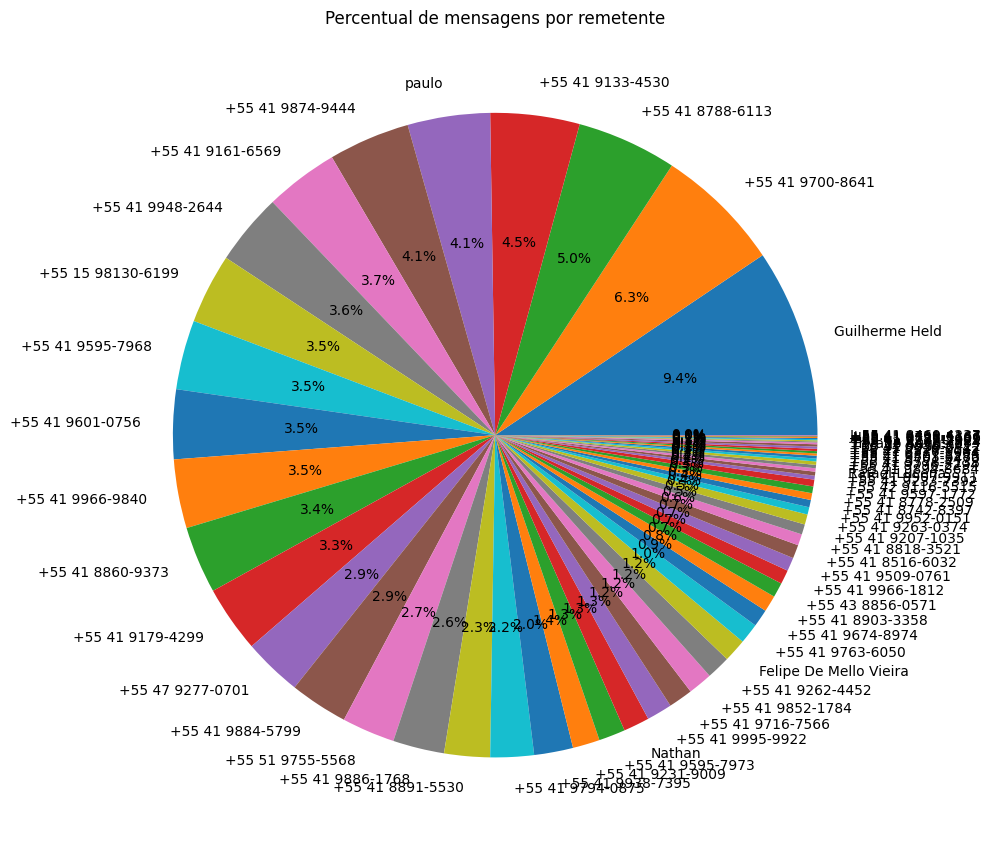

In [107]:
resumo_conversas = df['Remetente'].value_counts()

plt.figure(figsize=(10, 10))
resumo_conversas.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentual de mensagens por remetente')
plt.ylabel('')
plt.tight_layout()
plt.show()

Gráfico de linhas: apresentar a quantidade de mensagens ao longo do tempo (data) para cada remetente. Todos os remetentes devem estar presentes no gráfico. A linha de cada remetente neste gráfico deve ser representada por uma cor diferente.


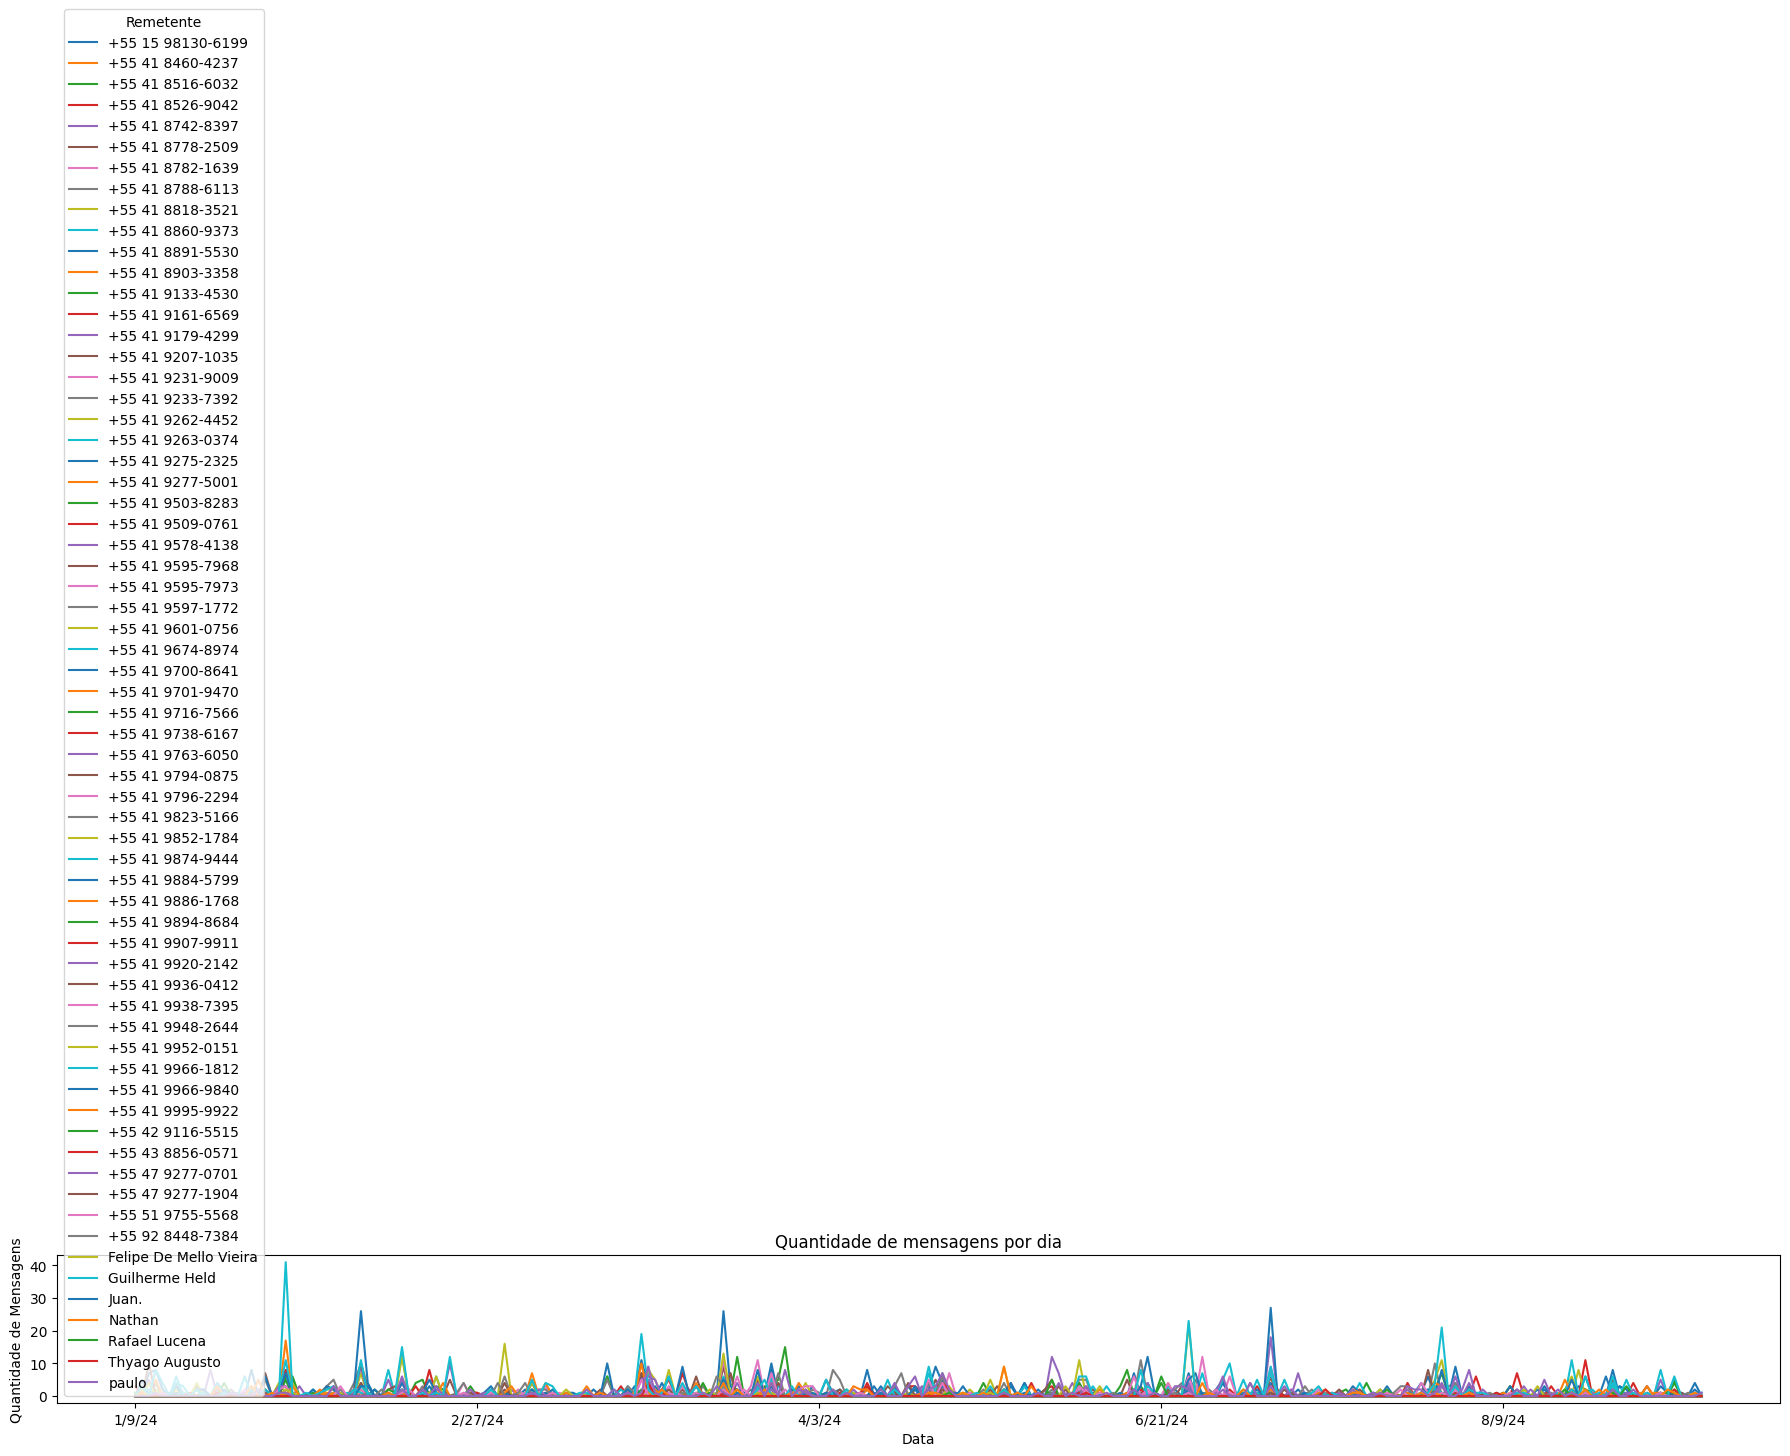

In [109]:

mensagens_por_data = df.groupby(['Data', 'Remetente']).size().unstack(fill_value=0)

mensagens_por_data.plot(figsize=(18, 9))

plt.title('Quantidade de mensagens por dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de Mensagens')
plt.legend(title='Remetente')
plt.tight_layout() #ajustar elementos grafico, para não sobrepor
plt.show()